In [ ]:
! pip install weightwatcher  transformers 

## Makes plots for theory paper: Model Quality

### This is the simplest possible modern MLP, 3 layers trained on MNIST

**IMPORTANT**:
- First train the models. See WW_MLP3_Training_pytorch.ipynb or WW_MLP3_Training_keras.ipynb

In [4]:
# If you are running this NB in google colab then execute this cell

from google.colab import drive
drive.mount('/drive')
results_dir = '/drive/MyDrive/setol_paper'

!ls $results_dir

In [1]:
import os
os.chdir("../pytorch")

# If you are running this NB locally then set your results directory and execute this cell

results_dir = "../pytorch/saved_models/SETOL"
!ls $results_dir

MNIST  OLD_FASHION  OLD_MNIST  TEST


## Model Quality plots: Batch Size search

Models were trained with 6 batch sizes, ranging from 1 to 32. In general, test error decreases as batch size decreases, down to a certain point, after which it increases again. In this case, that point was a batch size of 2. The train and test accuracy are shown in the first plot in the left-most position, as a function of batch size. Error bars show one standard deviation.

Notice however, that the error begins to rise when $\alpha$ fell below $2.0$ in the FC1 layer. This is shown in the middle plot in the first row. The second row shows the $\alpha$ values for the FC2 layer. These also decrease towards $2.0$ as batch size decreases. At the final batch size of 1, the error bars are much wider as well.

The third column shows the $\hat{\alpha}$ metric, which is called `alpha_weighted` in `weightwatcher`. As with $\alpha$, $\hat{\alpha}$ steadily decreases along with test error, but notice that as batch size reaches 1, $\hat{\alpha}$ increases significantly. In the FC1 layer, test error is on the same curve as the other points, while in FC2 it is larger than they are, and has drastically larger error bars, reflecting the distuptive effect of the overly small batch size.

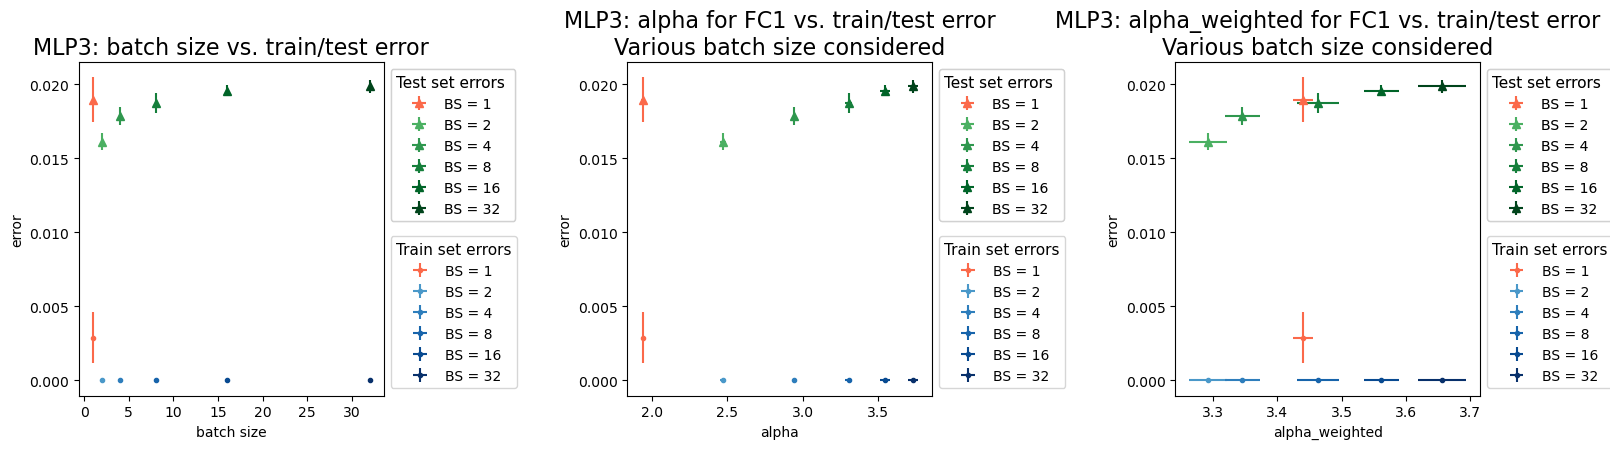

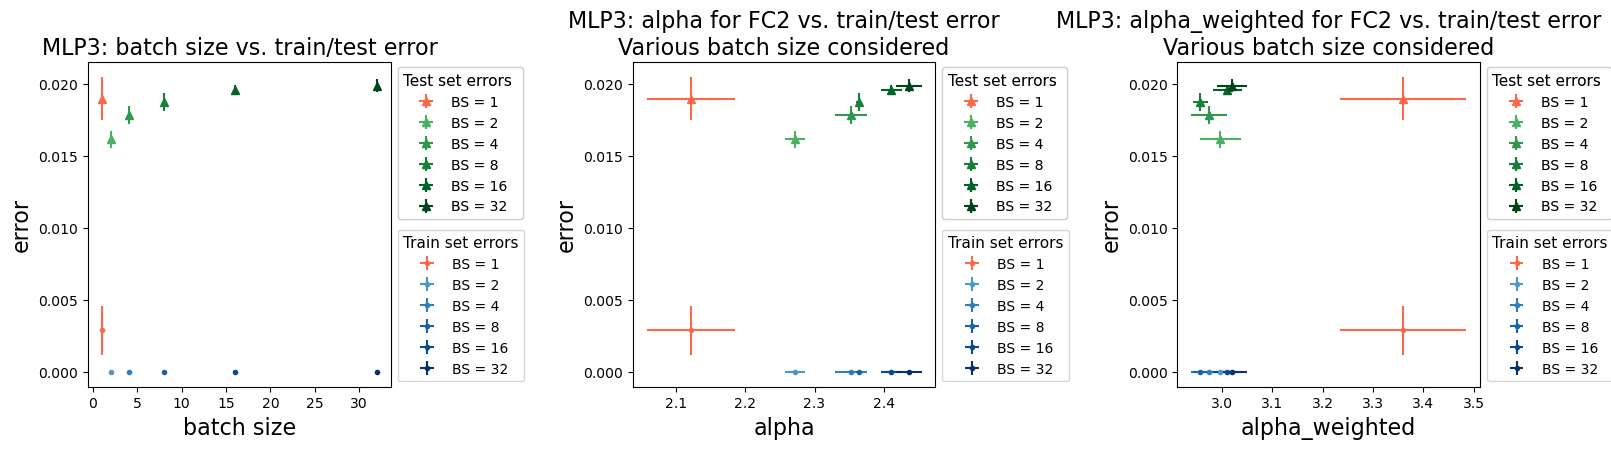

In [2]:
from plot_utils import plot_by_scales

DS = "MNIST"
WW_metrics = ["alpha", "alpha_weighted"]
search_param = "BS"

plot_by_scales(DS, "all", range(6), range(5), WW_metrics, plot_layer = 0, search_param=search_param)
plot_by_scales(DS, "all", range(6), range(5), WW_metrics, plot_layer = 1, search_param=search_param)

## Model Quality plots: Learning Rate search

There is a well known inverse relation between learning rate and batch size -- a small batch size is effectively the equivalent of a correspondingly larger learning rate. We can repeat the same experiment by using a constant batch size of 32, and instead increasing the learning rate by the same increments, from $1\times$, $2\times$, ... up to $32\times$. Here we see the same behaviors as before, except that the colors are reversed.

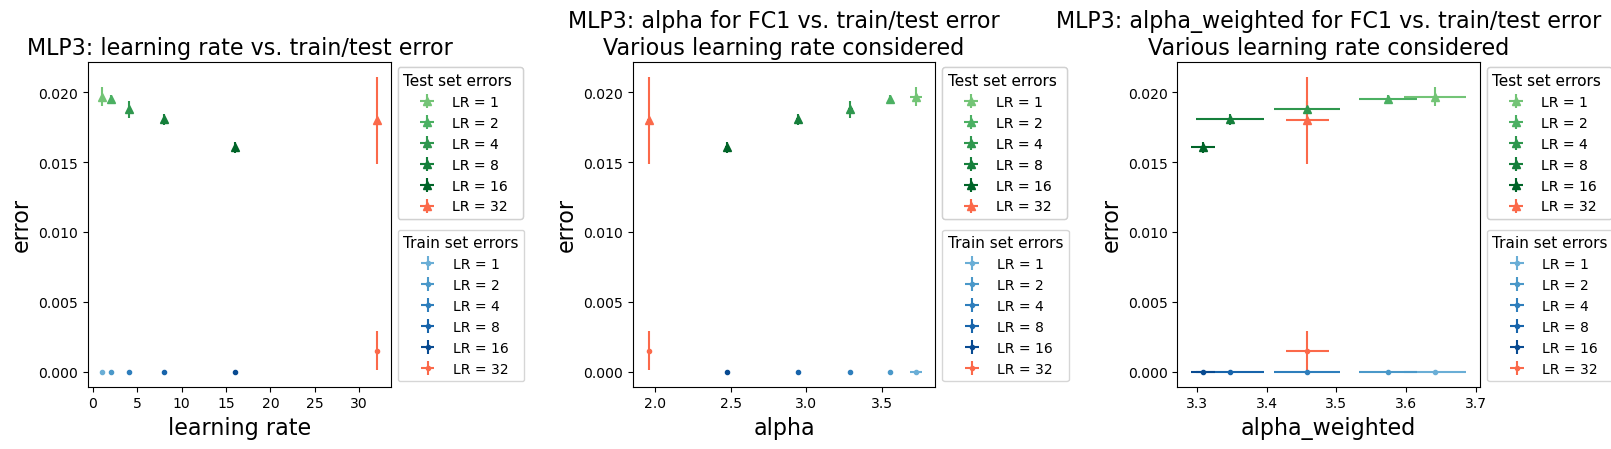

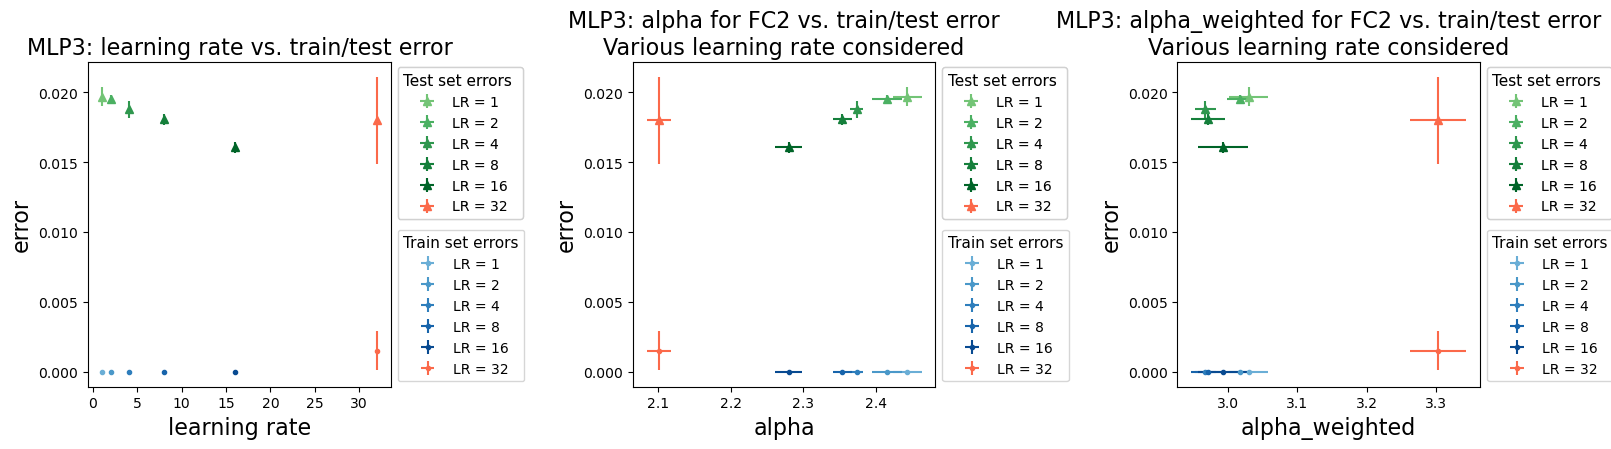

In [3]:
from plot_utils import plot_by_scales

DS = "MNIST"
WW_metrics = ["alpha", "alpha_weighted"]
search_param = "LR"

plot_by_scales(DS, "all", range(6), range(5), WW_metrics, plot_layer = 0, search_param=search_param)
plot_by_scales(DS, "all", range(6), range(5), WW_metrics, plot_layer = 1, search_param=search_param)

Here again we see in the left column that error declines up until the largest learning rate factor, after which it increases again, and the error bar is much wider. Comparing that with the middle column, which shows $\alpha_\mbox{FC1}$ in the top row and $\alpha_\mbox{FC2}$ in the bottom row, we see that as $\alpha_\mbox{FC1}$ approaches $2.0$ error decreases, but as $\alpha_\mbox{FC1}$ goes below $2.0$, error increases again, and the error bar for the *other* $\alpha$, $\alpha_\mbox{FC2}$, also increases. In the third column we see, as before, that for $\hat{\alpha}_{FC1}$ the point moves back to a more appropriate part of the curve, and that $\hat{\alpha}_\mbox{FC2}$ reflects the disruptive effect in that layer from having $\alpha_\mbox{FC1} < 2.0$.


### Training only a single layer

Since the SETOL is a theory about single layers, it makes sense to test it in context where only a single layer has been trained. If we pass `FC1` as an argument, we can see the model where only the FC1 layer was trained, and similarly for `FC2`.

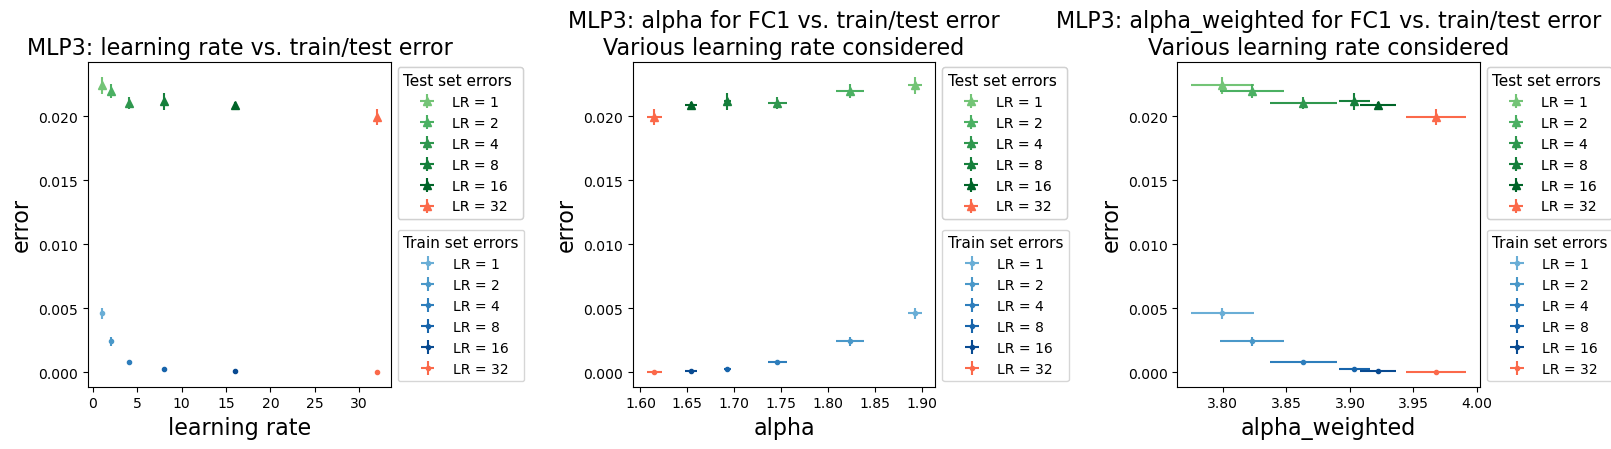

In [4]:
from plot_utils import plot_by_scales

DS = "MNIST"
WW_metrics = ["alpha", "alpha_weighted"]
search_param = "LR"

plot_by_scales(DS, "FC1", range(6), range(5), WW_metrics, plot_layer = 0, search_param=search_param)

Here we see that the overall shape is a decreasing trend in error as learning rate increases, but it never gets as low as when all layers are trained. That is, in all of the cases above where error was $< 0.02$, the $\alpha$ metrics for each layer were above $2.0$. Here, since all of the training is going into one layer, its alpha is pushed below $2.0$, and still it cannot reach an error as low as above. The $\hat{\alpha}$ metrics show an increasing trend, as the largest eigenvalue $\lambda_\max$ increases with the learning rate.

### Next we see what happens when only FC2 is trained

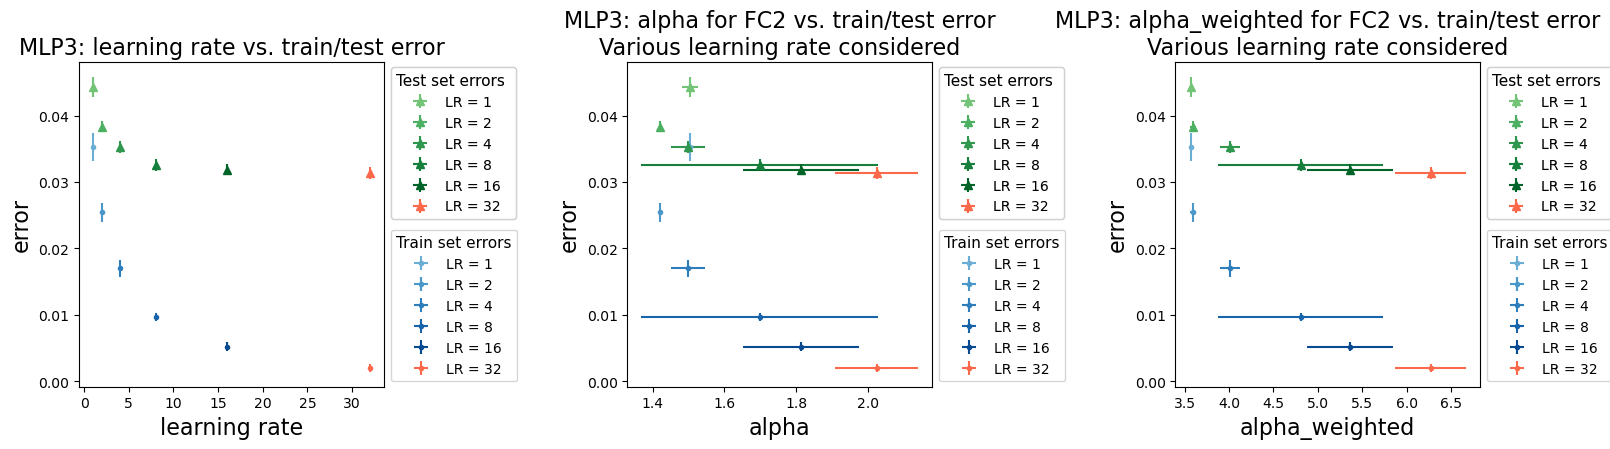

In [5]:
from plot_utils import plot_by_scales

DS = "MNIST"
WW_metrics = ["alpha", "alpha_weighted"]
search_param = "LR"

plot_by_scales(DS, "FC2", range(6), range(5), WW_metrics, plot_layer = 1, search_param=search_param)

Here we see a similar trend in the error rates - as learning rate increases, error generally trends lower, but never gets as low as when training all layers. In the FC2 layer itself, alphas are very low for the learning rates - almost all are $< 2.0$. But then, after LR reaches $8\times$, something else happens: they are larger on average, and the error bars are *huge*. What is going on? See the notebook `WW_MLP3_Analysis_Hysteresis_Effect.ipynb` to find out more.